# Machine Learning Project Part 2 - Model Comparison

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('./dataset/cleandata.csv', index_col=[0])

In [3]:
df

,age,education-num,capital-gain,capital-loss,hours-per-week,income,Local-gov,Never-worked,Private,Self-emp-inc,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8036,32,9,0,0,50,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1417,31,13,0,0,90,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
13498,63,15,0,0,30,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30749,41,12,0,1887,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
x = df.drop('income', axis=1)
y = df['income']

In [5]:
# original training set = 32561 data pt.
# original testing set = 16281 data pt.
# ratio = 65% : 35%
# so, set the test_size = 0.3

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(52017, 81)
(52017,)
(22293, 81)
(22293,)


In [8]:
# scale the training and testing data

scaler = StandardScaler() 
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 1. Logistic Regression

In [9]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)
logistic_pred = logistic.predict(x_test)

### Logistic Regression Model Evaluation

In [11]:
print(classification_report(y_test, logistic_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81     11155
           1       0.80      0.84      0.82     11138

    accuracy                           0.82     22293
   macro avg       0.82      0.82      0.82     22293
weighted avg       0.82      0.82      0.82     22293



# 2. SVM

In [12]:
SVM_model = LinearSVC()
SVM_model.fit(x_train, y_train)
SVM_pred = SVM_model.predict(x_test)

/Users/jennifertang/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### SVM Model Evaluation

In [13]:
print(classification_report(y_test, SVM_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81     11155
           1       0.80      0.85      0.82     11138

    accuracy                           0.82     22293
   macro avg       0.82      0.82      0.82     22293
weighted avg       0.82      0.82      0.82     22293



# 3. Decision Tree

In [14]:
Dtree = DecisionTreeClassifier()
Dtree.fit(x_train, y_train)
Dtree_pred = Dtree.predict(x_test)

### Decision Tree Model Evaluation

In [15]:
print(f"{classification_report(y_test, Dtree_pred)}")

              precision    recall  f1-score   support

           0       0.94      0.84      0.89     11155
           1       0.86      0.95      0.90     11138

    accuracy                           0.90     22293
   macro avg       0.90      0.90      0.90     22293
weighted avg       0.90      0.90      0.90     22293



# 4. KNN

In [16]:
#*******************************************      warning      ***************************************************
#*****************************************************************************************************************

# the following cell will take you around 15 mins to run

#*****************************************************************************************************************
#*****************************************************************************************************************

In [17]:
# find the optimum value of k

%time

k_range=range(1,26)
scores=[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    knn_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, knn_pred))

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs


In [18]:
k_value = [i for i in k_range]
for i in list(zip(k_value, scores)):
    print (i)

(1, 0.8845377472749294)
(2, 0.848741757502355)
(3, 0.8467680437805589)
(4, 0.8266271923922307)
(5, 0.8281074776835778)
(6, 0.8195397658457811)
(7, 0.8210200511371283)
(8, 0.8171623379536177)
(9, 0.8179249091643117)
(10, 0.8164894810030054)
(11, 0.8142017673709236)
(12, 0.8135289104203113)
(13, 0.8124074821692908)
(14, 0.811600053828556)
(15, 0.8137531960705154)
(16, 0.8125869106894541)
(17, 0.8114206253083928)
(18, 0.8102094827972907)
(19, 0.8089983402861884)
(20, 0.8082806262055354)
(21, 0.8077871977750863)
(22, 0.8085946261158211)
(23, 0.8075629121248823)
(24, 0.8072040550845557)
(25, 0.8062620553536984)


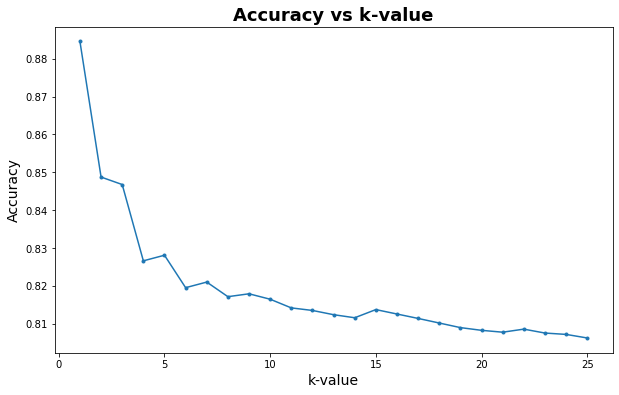

In [21]:
plt.figure(figsize=(10,6))
plt.plot(k_range, scores,  marker=".")
plt.title('Accuracy vs k-value', fontsize=18, fontweight='bold')
plt.xlabel('k-value', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.savefig('./graphs/optimum_k_value.png', dpi=720, bbox_inches='tight')
plt.show()

In [22]:
# apply the optimum value for k

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

### KNN Model Evaluation

In [23]:
print(f"{classification_report(y_test, knn_pred)}")

              precision    recall  f1-score   support

           0       0.92      0.84      0.88     11155
           1       0.85      0.93      0.89     11138

    accuracy                           0.88     22293
   macro avg       0.89      0.88      0.88     22293
weighted avg       0.89      0.88      0.88     22293



# 5. Random Forest

In [24]:
randomforest = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
randomforest.fit(x_train, y_train)
randomforest_pred = randomforest.predict(x_test)

### Random Forest Model Evaluation

In [25]:
print(f"{classification_report(y_test, randomforest_pred)}")

              precision    recall  f1-score   support

           0       0.95      0.86      0.91     11155
           1       0.88      0.96      0.91     11138

    accuracy                           0.91     22293
   macro avg       0.91      0.91      0.91     22293
weighted avg       0.91      0.91      0.91     22293



# 6. AdaBoost

In [26]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=100, random_state=10)
ada.fit(x_train, y_train)
ada_pred = ada.predict(x_test)

### AdaBoost Model Evaluation

In [27]:
print(f"{classification_report(y_test, ada_pred)}")

              precision    recall  f1-score   support

           0       0.87      0.82      0.84     11155
           1       0.83      0.88      0.85     11138

    accuracy                           0.85     22293
   macro avg       0.85      0.85      0.85     22293
weighted avg       0.85      0.85      0.85     22293



# 7. XGBoost

In [28]:
xg = xgboost.XGBClassifier()
xg.fit(x_train, y_train)
xg_pred = xg.predict(x_test)

/Users/jennifertang/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:22:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### XGBoost Model Evaluation

In [29]:
print(f"{classification_report(y_test, xg_pred)}")

              precision    recall  f1-score   support

           0       0.88      0.83      0.85     11155
           1       0.84      0.89      0.86     11138

    accuracy                           0.86     22293
   macro avg       0.86      0.86      0.86     22293
weighted avg       0.86      0.86      0.86     22293



# ROC - AUC graph

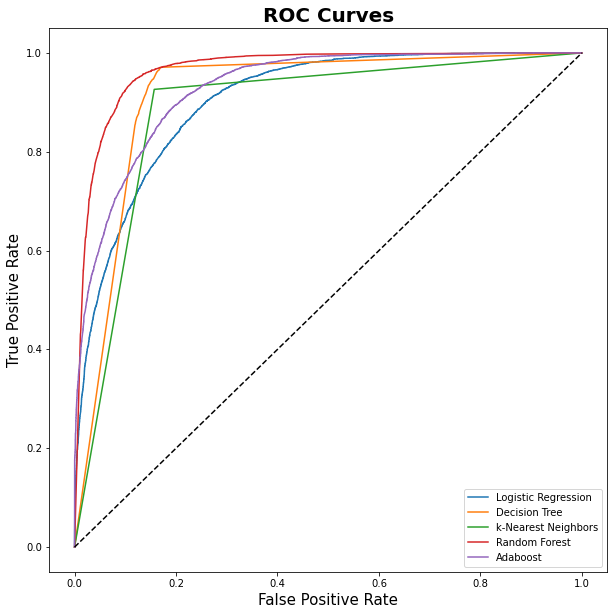

In [30]:
plt.figure(figsize=(10, 10))

# for 1.Logistic Regression
logistic_pred_prob = logistic.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, logistic_pred_prob)
plt.plot(fpr, tpr, label='Logistic Regression')

# for 3.Decision Tree
Dtree_pred_prob = Dtree.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, Dtree_pred_prob)
plt.plot(fpr, tpr, label='Decision Tree')

# for 4.KNN
knn_pred_prob = knn.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, knn_pred_prob)
plt.plot(fpr, tpr, label='k-Nearest Neighbors')

# for 5.Random Forest
randomforest_pred_prob = randomforest.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, randomforest_pred_prob)
plt.plot(fpr, tpr, label='Random Forest')

# for 6.Adaboost
ada_pred_prob = ada.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, ada_pred_prob)
plt.plot(fpr, tpr, label='Adaboost')

plt.plot([0,1], [0,1], 'k--')

plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('ROC Curves', fontsize=20, fontweight='bold')

plt.legend()
plt.savefig('./graphs/ROC_curves.png', dpi=720, bbox_inches='tight')
plt.show()

In [31]:
model = ['Logistic Regression', 'Decision Tree', 'k-Nearest Neighbors', 'Random Forest', 'Adaboost']
a = roc_auc_score(y_test, logistic_pred_prob)
b = roc_auc_score(y_test, Dtree_pred_prob)
c = roc_auc_score(y_test, knn_pred_prob)
d = roc_auc_score(y_test, randomforest_pred_prob)
e = roc_auc_score(y_test, ada_pred_prob)
auc = [a, b, c, d, e]

In [32]:
acc1=accuracy_score(y_test, logistic_pred)
acc2=accuracy_score(y_test, Dtree_pred)
acc3=accuracy_score(y_test, knn_pred)
acc4=accuracy_score(y_test, randomforest_pred)
acc5=accuracy_score(y_test, ada_pred)
accuracy = [acc1, acc2, acc3, acc4, acc5]

In [33]:
comparison = pd.DataFrame(list(zip(accuracy, auc)), index=model, columns=['accuracy', 'area under curve'])

In [34]:
comparison

,accuracy,area under curve
Logistic Regression,0.818149,0.904399
Decision Tree,0.895842,0.915825
k-Nearest Neighbors,0.884538,0.884569
Random Forest,0.910959,0.965645
Adaboost,0.847575,0.928759


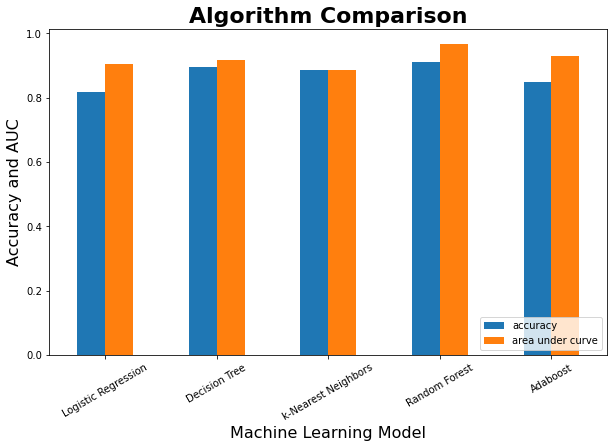

In [35]:
plt.rcParams['figure.figsize']=(10, 6)
comparison.plot(kind='bar')
plt.xlabel('Machine Learning Model', fontsize=16)
plt.ylabel('Accuracy and AUC', fontsize=16)
plt.title('Algorithm Comparison', fontsize=22, fontweight='bold')
plt.xticks(rotation=30)
plt.legend(loc = "lower right")
plt.savefig('./graphs/accuracy_and_auc', dpi=720, bbox_inches='tight')
plt.show()

In [36]:
#*******************************************      warning      ***************************************************
#*****************************************************************************************************************



# the following cell will take you almost """"1 HOUR"""" to run



#*****************************************************************************************************************
#*****************************************************************************************************************

Logistic Regression: 0.821385 (0.003354)
SVM: 0.826057 (0.003445)
Decision Tree: 0.888537 (0.003622)
KNN: 0.877079 (0.003798)
Random Forest: 0.905396 (0.005509)
AdaBoost: 0.850953 (0.004164)


/Users/jennifertang/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:10:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jennifertang/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:11:06] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jennifertang/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:11:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jennifertang/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:11:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jennifertang/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:11:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jennifertang/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:11:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jennifertang/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:12:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jennifertang/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:12:17] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jennifertang/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:12:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jennifertang/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:12:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost: 0.860603 (0.003902)


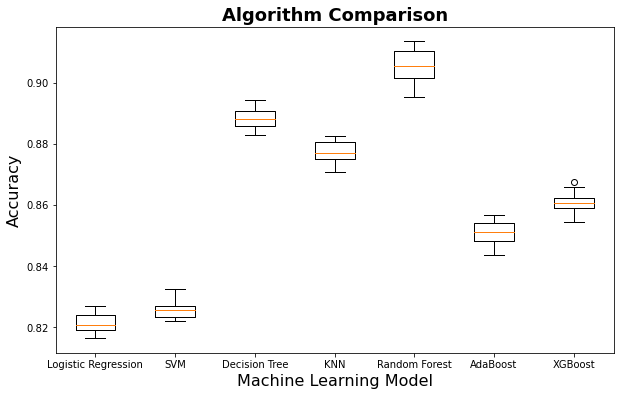

In [39]:
# Spot Check Algorithms
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('SVM', SVC()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
models.append(('Random Forest',RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=42))) #We chose this
models.append(('AdaBoost', AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=100, random_state=10)))
models.append(('XGBoost', xgboost.XGBClassifier()))

# Evaluate Each Model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison', fontsize=18, fontweight='bold')
plt.xlabel('Machine Learning Model', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.savefig('./graphs/algorithm_comparison', dpi=720, bbox_inches='tight')          
plt.show()